# Homework 3
### Kyle Hadley

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter('ignore')

## 1. Math Warm-up

Given that our multivariate Gaussian class-conditional distributions $p(x|y)$ is defined by the equation

$$p(x|y) = \frac{1}{|2\pi C_y|^{m/2}} exp\left(-\frac{1}{2}(x-\mu_y)^T C_y^{-1}(x-\mu_y) \right)$$

### (a)

If we have an equal class variance case (i.e. $C_0 = C_1 = C$), then we write our log ratio as follows:

$$\log\frac{p(x_i|y=1)}{p(x_i|y=0)} + \log\frac{p(y=1)}{p(y=0)} = \log\frac{p(x_i|y=1)}{p(x_i|y=0)}$$

as we know that $p(y=0)=p(y=1)$, and $\log(1) = 0$. Now applying our relationship for $p(x|y)$,

$$\log\frac{p(x_i|y=1)}{p(x_i|y=0)} = \log \frac{\left( \frac{1}{|2\pi C_1|^{m/2}} exp\left(... \right)\right)}{\left( \frac{1}{|2\pi C_0|^{m/2}} exp\left(... \right)\right)}$$

where $...$ represents the value inside the numerator. Given that $C_0 = C_1 = C$ and it is just a constant, the term $\frac{1}{|2\pi C_y|^{m/2}}$ will cancel out from the top and bottom leaving us with,

$$\log \frac{\left(exp\left(-\frac{1}{2}(x_i-\mu_1)^T C_1^{-1}(x_i-\mu_1)) \right)\right)}{\left(exp\left(-\frac{1}{2}(x_i-\mu_0)^T C_0^{-1}(x_i-\mu_0) \right)\right)}$$

This can be simplified further to,

$$\log \left(exp\left(-\frac{1}{2}(x_i-\mu_1)^T C_1^{-1}(x_i-\mu_1) \right)\right) - \log \left(exp\left(-\frac{1}{2}(x_i-\mu_0)^T C_0^{-1}(x_i-\mu_0) \right)\right)$$
$$\left(-\frac{1}{2}(x_i-\mu_1)^T C_1^{-1}(x_i-\mu_1) \right) - \left(-\frac{1}{2}(x_i-\mu_0)^T C_0^{-1}(x_i-\mu_0) \right)$$

Again, given that $C_0 = C_1 = C$ and combining similar terms we find,

$$-\frac{1}{2}(x_i-\mu_1)^T C^{-1}(x_i-\mu_1) +\frac{1}{2}(x_i-\mu_0)^T C^{-1}(x_i-\mu_0)$$

$$-\frac{1}{2}\left(x_i^TC^{-1}x_i - x_i^TC^{-1}\mu_1 - \mu_1^TC^{-1}x_i + \mu_1^TC^{-1}\mu_1\right) +\frac{1}{2}\left(x_i^TC^{-1}x_i - x_i^TC^{-1}\mu_0 - \mu_0^TC^{-1}x_i + \mu_0^TC^{-1}\mu_0\right)$$

$$-\frac{1}{2}\left(- \mu_1^TC^{-1}x_i - \mu_1^TC^{-1}x_i + \mu_1^TC^{-1}\mu_1\right) +\frac{1}{2}\left(- \mu_0^TC^{-1}x_i - \mu_0^TC^{-1}x_i + \mu_0^TC^{-1}\mu_0\right)$$

$$(C^{-1}\mu_1 - C^{-1}\mu_0)^Tx_i + \mu_0^T C^{-1} \mu_0 - \mu_1^T C^{-1}\mu_1$$

From this form of the log ratio, we can now equate $b_i = (C^{-1}\mu_1 - C^{-1}\mu_0)^T$ and $c_i = \mu_0^T C^{-1} \mu_0 - \mu_1^T C^{-1}\mu_1$ such that the log ratio is $b_ix_i + c_i$ (which can be written as $b_i x + c_i$ when we include the summation).


## 2. Gaussian Distribution and the Curse of Dimensionality

### (a)

When $m=2$, we know that a "sphere" in 2D space is actually a circle - thus we can define $S_{2-1}(r) = S_{1}(r)$ and $V_{2}(r)$ based on the known surface area and area (i.e. volume) equations for a circle,

$$S_{1}(r) = 2 \pi r$$
$$V_{2}(r) = \pi r^2$$

When $m=3$, a sphere follows the standard sphere equations - thus we can define $S_{3-1}(r) = S_{2}(r)$ and $V_{3}(r)$ based on the known surface area and volume equations for a sphere,

$$S_{2}(r) = 4 \pi r^2$$
$$V_{3}(r) = \frac{4}{3} \pi r^3$$

### (b)

The equation $S_{m-1} = \frac{d}{dr}V_m(r)$ states that the derivative of the volume of a $m$-dimensional sphere is its surface area (i.e. $S_{m-1}). We can see that this realtionship holds true from our derived equations from part (a) such that,

$$\frac{d}{dr}V_2(r) = \frac{d}{dr} (\pi r^2) = 2 \pi r = S_{1}(r)$$
$$\frac{d}{dr}V_3(r) = \frac{d}{dr} \left(\frac{4}{3}\pi r^3\right) = 4 \pi r^2 = S_{2}(r)$$

### (c)

$$S_{m-1}(r) = \bar{S}_{m-1} r^{m-1}$$

### (d)

*Note: Worked problem with Tess, Charlie, Dean, and Steve from class on this problem.*

We can solve for $\rho_m (r) = \int_{x \in \delta_{m-1}(r)} p(x) dx$ by using our known equation for $p(x)$ first; thus,

$$\rho_m (r) = \int_{x \in \delta_{m-1}(r)} \frac{1}{(2\pi \sigma^2)^{m/2}} exp\left(-\frac{\|x \| _2^2}{2\sigma^2}\right) dx$$

We can extract our first term as it is not a function of $x$ such that

$$\rho_m (r) = \frac{1}{(2\pi \sigma^2)^{m/2}} \int_{x \in \delta_{m-1}(r)} exp\left(-\frac{\|x \| _2^2}{2\sigma^2}\right) dx$$

We can now substitute the relationship defined by $\delta_{m-1}(r)$ in which $\|x\|_2 = r$; thus,

$$\rho_m (r) = \frac{1}{(2\pi \sigma^2)^{m/2}} \int_{x \in \delta_{m-1}(r)} exp\left(\frac{-r^2}{2\sigma^2}\right) dx$$
$$\rho_m (r) = \frac{exp\left(\frac{-r^2}{2\sigma^2}\right)}{(2\pi \sigma^2)^{m/2}} \int_{x \in \delta_{m-1}(r)}  dx$$

From part (c), we know that the integral of all points about the surface of the m-sphere is just the surface area of the m-sphere itself (i.e. $\int_{x \in \delta_{m-1}(r)} dx = \bar{S}_{m-1}r^{m-1}$); thus,

$$\rho_m (r) = \frac{exp\left(\frac{-r^2}{2\sigma^2}\right)}{(2\pi \sigma^2)^{m/2}} \bar{S}_{m-1} r^{m-1}$$

### (e)

*Note: Worked problem with Tess, Charlie, Dean, and Steve from class on this problem.*

We can show that for large $m$, that $\rho_m(r)$ has a single maximum value $\hat{r}$ such that $\hat{r} \approx \sqrt{m}\sigma$, by taking the derivative of $\rho_m(r)$ with respect to $r$ such that,

$$ \frac{d}{dr} \rho_m (r) = \frac{d}{dr} \left( \frac{exp\left(\frac{-r^2}{2\sigma^2}\right)}{(2\pi \sigma^2)^{m/2}} \bar{S}_{m-1} r^{m-1} \right) = \frac{\bar{S}_{m-1} }{(2\pi \sigma^2)^{m/2}} \frac{d}{dr}\left(exp\left(\frac{-r^2}{2\sigma^2}\right)  r^{m-1}\right)$$

Once we've taken the derivative, we will be setting it equal to zero to find our maximum value (at $\hat{r}$), so we can eliminate the constant term $\frac{\bar{S}_{m-1} }{(2\pi \sigma^2)^{m/2}}$ as they will be divided out. Thus, our resulting equation when set equal to zero is:

$$\frac{d}{dr}\left(exp\left(\frac{-r^2}{2\sigma^2}\right)  r^{m-1}\right) = 0$$

Applying the product rule,

$$\frac{d}{dr}\left(exp\left(\frac{-r^2}{2\sigma^2}\right) \right) r^{m-1} + exp\left(\frac{-r^2}{2\sigma^2}\right) \frac{d}{dr}\left(r^{m-1}\right)  = 0$$
$$exp\left(\frac{-r^2}{2\sigma^2}\right) \frac{-2r}{2\sigma^2} r^{m-1} + exp\left(\frac{-r^2}{2\sigma^2}\right) (m-1)r^{m-2}  = 0$$

Simplifying this,

$$\frac{-r^m}{\sigma^2} + (m-1)r^{m-2}  = 0$$
$$\frac{-1}{\sigma^2} + (m-1)r^{-2}  = 0$$
$$(m-1)r^{-2}  = \sigma^{-2}$$
$$r^{2}  = (m-1)\sigma^2$$
$$r  = \sqrt{(m-1)}\sigma$$

With our assumption, when we have a large $m$ we can assume that $m-1 \approx m$; thus,

$$\hat{r} \approx \sqrt{m}\sigma$$

### (f)

We can show that for large $m$ and a small value $\epsilon$ such that $\epsilon \ll \hat{r}$, that $\rho(\hat{r} + \epsilon) \approx \rho(\hat{r}) e^{-\frac{\epsilon^2}{\sigma^2}}$, by first relating $\rho(\hat{r} + \epsilon)$ and $\rho(\hat{r})$ through a fractional relationship such that,

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = \frac{\frac{\bar{S}_{m-1} }{(2\pi \sigma^2)^{m/2}} exp\left(\frac{-(\hat{r}+\epsilon)^2}{2\sigma^2}\right)  (\hat{r}+\epsilon)^{m-1}}{\frac{\bar{S}_{m-1} }{(2\pi \sigma^2)^{m/2}} exp\left(\frac{-\hat{r}^2}{2\sigma^2}\right)  \hat{r}^{m-1}}$$

Simplifying by eliminating common terms from top and bottom we're left with,

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = \frac{exp\left(\frac{-(\hat{r}+\epsilon)^2}{2\sigma^2}\right)  (\hat{r}+\epsilon)^{m-1}}{exp\left(\frac{-\hat{r}^2}{2\sigma^2}\right)  \hat{r}^{m-1}}$$

We can combine all terms into the exponential such that,

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = \frac{exp\left(\frac{-(\hat{r}+\epsilon)^2}{2\sigma^2}\right)  exp(\ln((\hat{r}+\epsilon)^{m-1})}{exp\left(\frac{-\hat{r}^2}{2\sigma^2}\right)  exp(\ln(\hat{r}^{m-1}))}$$

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = exp\left(\frac{-(\hat{r}+\epsilon)^2}{2\sigma^2} + \ln((\hat{r}+\epsilon)^{m-1}) + \frac{\hat{r}^2}{2\sigma^2} - \ln(\hat{r}^{m-1})\right)$$

Combining like terms we find,

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = exp\left(\frac{-(\hat{r}+\epsilon)^2 + \hat{r}^{2}}{2\sigma^2} + \ln((\hat{r}+\epsilon)^{m-1}) - \ln(\hat{r}^{m-1})\right)$$

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = exp\left(\frac{-2\hat{r}\epsilon - \epsilon^2}{2\sigma^2} + \ln((\hat{r}+\epsilon)^{m-1}) - \ln(\hat{r}^{m-1})\right)$$

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = exp\left(\frac{-2\hat{r}\epsilon - \epsilon^2}{2\sigma^2} + \ln\left(\frac{(\hat{r}+\epsilon)^{m-1}}{\hat{r}^{m-1}}\right)\right)$$

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} = exp\left(\frac{-2\hat{r}\epsilon - \epsilon^2}{2\sigma^2} + (m-1)\ln\left(1 + \frac{\epsilon}{\hat{r}}\right)\right)$$

We can apply a 2-term Maclauren expansion approximation of the form $ln\left(1+x\right)$ such that,

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} \approx exp\left(\frac{-2\hat{r}\epsilon - \epsilon^2}{2\sigma^2} + (m-1)\left(\frac{\epsilon}{\hat{r}} - \frac{1}{2}\left(\frac{\epsilon}{\hat{r}}\right)^2\right)\right)$$

Substituting $\hat{r} \approx \sqrt{m} \sigma$ as found in part (e),

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} \approx exp\left(\frac{-2\sqrt{m}\sigma\epsilon - \epsilon^2}{2\sigma^2} + (m-1)\left(\frac{\epsilon}{\sqrt{m} \sigma} - \frac{\epsilon^2}{2 m \sigma^2}\right)\right)$$

With our assumption, when we have a large $m$ we can assume that $m-1 \approx m$; thus,

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} \approx exp\left(\frac{-2\sqrt{m}\sigma\epsilon - \epsilon^2}{2\sigma^2} + m\left(\frac{\epsilon}{\sqrt{m} \sigma} - \frac{\epsilon^2}{2 m \sigma^2}\right)\right)$$

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} \approx exp\left(\frac{-2\sqrt{m}\sigma\epsilon - \epsilon^2}{2\sigma^2} + \frac{\sqrt{m}\epsilon}{\sigma} - \frac{\epsilon^2}{2\sigma^2}\right)$$

Simplifying we find,

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} \approx exp\left(\frac{-2\sqrt{m}\sigma\epsilon - \epsilon^2 + 2\sqrt{m}\sigma\epsilon - \epsilon^2}{2\sigma^2}\right)$$

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} \approx exp\left(\frac{-2 \epsilon^2}{2\sigma^2}\right)$$

$$\frac{\rho(\hat{r} + \epsilon)}{\rho(\hat{r})} \approx exp\left(\frac{-\epsilon^2}{\sigma^2}\right)$$

$$\rho(\hat{r} + \epsilon) \approx \rho(\hat{r})exp\left(\frac{-\epsilon^2}{\sigma^2}\right)$$

Thus, we can see that for large $m$ and a small value $\epsilon \ll \hat{r}$, $\rho(\hat{r} + \epsilon) \approx \rho(\hat{r})exp\left(\frac{-\epsilon^2}{\sigma^2}\right)$.

### (g)

For the high dimensional Gaussian distribution ($m$ is large), the majority of our points will reside at our value $\sqrt{m}$ as we see in our equation $\hat{r} \approx \sqrt{m}\sigma$ where $\sigma$ is small compared to $\hat{r}$.

For a low dimensional Guassian distribution, most points will reside around the origin $x=0$ because most of the mass is centered at the origin within the window of roughly $\sigma$.

### (h)

Calculating the probability density at the origin, we find that

$$\rho_m (0) = \frac{exp\left(\frac{-(0)^2}{2\sigma^2}\right)}{(2\pi \sigma^2)^{m/2}} \bar{S}_{m-1} (0)^{m-1} = 0$$

Calculating the probability density at a point on the sphere,

$$\rho_m (\hat{r}) = \frac{exp\left(\frac{-(\hat{r})^2}{2\sigma^2}\right)}{(2\pi \sigma^2)^{m/2}} \bar{S}_{m-1} (\hat{r})^{m-1}$$

For large $m$, i.e. high dimensionality, we can approximate $\hat{r}$ as $\sqrt{m} \sigma$, such that

$$\rho_m (\hat{r}) = \frac{exp\left(\frac{-(\sqrt{m} \sigma)^2}{2\sigma^2}\right)}{(2\pi \sigma^2)^{m/2}} \bar{S}_{m-1} (\sqrt{m} \sigma)^{m-1}$$

$$\rho_m (\hat{r}) = \frac{exp\left(\frac{-m}{2}\right)}{(2\pi \sigma^2)^{m/2}} \bar{S}_{m-1} (\sqrt{m} \sigma)^{m-1}$$


### (i)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

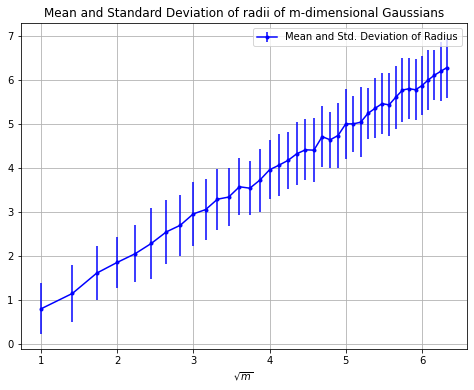

In [23]:
m = np.arange(40) + 1
sample_size = 100

# Set an arbitrary mean and std. deviation value for our m-dimensional Gaussian
mean_G = 0
sigma_G = 1

mean = np.empty(shape=(40))
std_dev = np.empty(shape=(40))

for m_i in m:
    # For each value of m (i.e. each m-dimensional Gaussian), generate a random sample of 100 x values
    cov_i = np.identity(m_i) * sigma_G**2
    mean_i = np.ones(m_i) * mean_G
    x_i = np.random.multivariate_normal(mean_i, cov_i, size=100)
    
    # Calculate the radii of the samples (i.e. the sqrt(x^2) = abs(x))
    r_i = np.sum(x_i**2, axis=1)**(1/2)
    #print('\n', x_i.shape, r_i.shape)

    # Calculate the mean and std deviation
    mean[m_i - 1] = np.mean(r_i)
    std_dev[m_i - 1] = np.std(r_i)

#print(mean.shape, std_dev.shape)

# Generate a 2D plot of mean/std dev. vs. m
fig, ax = plt.subplots(figsize=(8, 6))
#plt.plot(m, mean, ls = '-', marker = '.', c = 'blue', label = 'Mean')
#plt.plot(m, std_dev, ls = '-', marker = '.', c='red', label = 'Standard Deviation')
plt.errorbar(np.sqrt(m), mean, yerr=std_dev, marker='.', c='blue', label='Mean and Std. Deviation of Radius')
#plt.errorbar(m, mean, yerr=std_dev, marker='.', c='red', label='Mean and Std. Deviation of Radius')
plt.grid()
plt.legend()
plt.xlabel('$\sqrt{m}$')
plt.title('Mean and Standard Deviation of radii of m-dimensional Gaussians')
fig.show()
plt.savefig('Problem_2_i.png') # If saving a file

## 3. Programming Problem: Lasso

